Le plan d'analyse est décrit dans le fichier d'Agnès DENEVE : Imagerie_07052024.docx (mail du 07/05/2024)  
  
  
Rq : Attention une version corrigée des données Imagerie_30052024.xlsx remplace le fichier initiale Imagerie_07052024.xlsx

In [1]:
#import des libraires nécessaires
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from brainspace.mesh.mesh_io import read_surface
from brainspace.plotting import plot_hemispheres
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
import glob
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import laBIBILaRORO as lbr
from importlib import reload
#reload(laBIBILaRORO)
from itertools import combinations
#! pip install pingouin
import pingouin as pg
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import re
from scipy.stats import zscore
%matplotlib inline
from IPython.display import display,Image

import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
import pingouin as pg

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


La bibil à RORO loaded


Déclaration et définition des variables

In [2]:
#Chemin 
STUDY_PATH=os.path.join("/NAS","dumbo","protocoles","PSY_bvFTD")

DERIVATIVE_DIR1=os.path.join(STUDY_PATH,"data","bids","derivatives")
DERIVATIVE_DIR2=os.path.join("/NAS","deathrow","renaud","MRI_INSCD_maximeBertoux","bids","derivatives")


lecture du fichier Imagerie_30052024.xlsx (var = clinical_data)

In [3]:
#Lecture des deux fichiers Excel (variables clinique)
#clinical_data = pd.read_excel(os.path.join(STUDY_PATH,"Imagerie_30052024.xlsx"))
clinical_data = pd.read_excel(os.path.join(STUDY_PATH,"ETUDES_21082024.xlsx"))
clinical_data.set_index("ID_IRM", inplace=True)

#var=pd.read_excel(os.path.join(STUDY_PATH,'Imagerie_30052024.xlsx'),index_col="Nom")
#var=var.drop(columns=["DIAGNOSTIC"])
#var=var.drop(columns=["Date_IRM_Proche_BNP"])
#var=var.drop(columns=["DDN"])
etude1=clinical_data[clinical_data['ETUDE1_IRM']=='oui']
etude2=clinical_data[clinical_data['ETUDE2_IRM']=='oui']
print(len(clinical_data))

146


In [4]:
print(clinical_data.columns)

Index(['CENTRE', 'IDENTIFIANT', 'Nom', 'Prenom', 'DDN',
       'Dates_BNP_MINISEA_ETUDE 1', 'Unnamed: 7', 'Dates_IRM', 'NOMBRE_IRM',
       'Date_IRM_Proche_BNP', 'Temps_Mois_IRM', 'Dates_TEP', 'NOMBRE_TEP',
       'Date_TEP_Proche_BNP', 'Temps_Mois_PET', 'ETUDE1_IRM', 'ETUDE1_PET',
       'AGE', 'EDUCATION', 'GENDER', 'GROUPE', 'SOUS_GROUPE', 'FER', 'mFP',
       'mFP_SocialContext', 'mFP_Mentalizing', 'mFP_Controls', 'Praxies',
       'VOSP', 'TMT_B_A', 'Stroop_3-1', 'Empan_endroit', 'Empan_envers',
       'CODE_WAIS', 'Denomination', 'DTLA', 'FCSRT_RL', 'FCSRT_RT', 'TOP10',
       'FER_EVC', 'FER_EVN', 'mFP_IDK', 'mFP_WrongC', 'mFP_WrongFP',
       'mFP_Norm', 'mFP_Altertive', 'mFP_Irrelevant', 'mFP_Jugmental',
       'mFP_Consequences', 'mFP_Malicious', 'mFP_Undermentalizing',
       'mFP_Intentiol', 'mFP_WrongEmot', 'mFP_NoEmot', 'Dates_GREMOTS_ETUDE2',
       'Dates_IRM.1', 'NOMBRE_IRM.1', 'Date_IRM_Proche_GREMOTS',
       'Temps_Mois_IRM.1', 'Dates_TEP.1', 'NOMBRE_TEP.1',
      

In [5]:
print(len(clinical_data))
etude1=clinical_data[clinical_data['ETUDE1_IRM']=='oui']
print(len(etude1))
selected_columns = etude1.loc[:, ['Date_IRM_Proche_BNP', 'Date_IRM_Proche_GREMOTS']]

selected_columns

146
125


Date_IRM_Proche_BNP Date_IRM_Proche_GREMOTS
ID_IRM                                               
c06p0013                  NaN                     NaN
c06p0014                  NaN                     NaN
c06p0015                  NaN                     NaN
c06p0016                  NaN                     NaN
c06p0017                  NaN                     NaN
...                       ...                     ...
PSY055    2019-06-21 00:00:00     2019-06-21 00:00:00
PSY089    2022-07-01 00:00:00                     NaN
PSY057    2020-12-04 00:00:00                     NaN
PSY058    2019-02-15 00:00:00     2019-02-15 00:00:00
PSY059    2021-02-23 00:00:00     2021-02-23 00:00:00

[125 rows x 2 columns]

In [6]:
#prof = pd.read_excel(os.path.join(STUDY_PATH,'BDD_Imagerie_Etude_Neuropsy_ProfileJD.xlsx'),index_col="Nom")

In [7]:
# Liste des patients
#liste_patients = list(set(list(etude1.index) + list(etude2.index))-set(prof.index))
#print(liste_patients)
# Récupération des champs "xx" et "bb" pour les patients de la liste
#df_patients = var.loc[var.index.isin(liste_patients), ['IDENTIFIANT','Prenom','DDN',"Dates_BNP_MINISEA_","Date_IRM_Proche_BNP","Dates_IRM","GROUPE"]]
#df_patients

In [8]:
#Controls=var[var['GROUPE'] == 'Control']
#bvFTD=var[var['GROUPE'] == 'bvFTD']
#PPD=var[var['GROUPE'] == 'PPD']

In [10]:
files = glob.glob(os.path.join(STUDY_PATH,"csv_sulcus2","sub-*.csv"))

df4col=pd.read_csv(os.path.join(STUDY_PATH,"csv_sulcus2","sub-PSY088_ses-1_acq-2013DT1TFE++3D_T1w_default_session_auto_sulcal_morphometry.csv"),sep=';')
colonnes=['subj'] #,'group','ss-group','age','education','sexe']
#colonnes=['ID_IRM','GROUPE','AGE','GENDER','SOUS_GROUPE']

for sillon in df4col['sulcus']:
    for col in df4col.columns[3:]:
        colonnes.append(sillon+"_"+col)

df_sulcus = pd.DataFrame(columns=colonnes)

for cpt,file in enumerate(files) :
    df_tmp=pd.read_csv(file,sep=';')        
    resultat = re.search(r'-(.*?)[\._]', file)
    subj = resultat.group(1)
    
    if subj in clinical_data.index:
        df_sulcus.loc[cpt]=[subj]+list(df_tmp.iloc[:,3:].values.flatten())        # Use subject_data for further processing
    else:
        print(f"Subject {subj} not found in clinical data.") 

df_sulcus.set_index("subj", inplace=True)


Subject c06p0028 not found in clinical data.
Subject PSY009 not found in clinical data.
Subject PSY053 not found in clinical data.
Subject PSY004 not found in clinical data.
Subject PSY056 not found in clinical data.


In [11]:
print(f"{df_sulcus.shape[0]} fichiers et {df_sulcus.shape[1]} caractéristiques de sillons")
print("123 silllons et 10 caractéristiques")

108 fichiers et 1230 caractéristiques de sillons
123 silllons et 10 caractéristiques


Préparation des analyses des sillons par BRAINVISA

Lecture du fichier la correspondance label  et acronyme de Brainvisa

In [12]:
lut_names=pd.read_csv(os.path.join(STUDY_PATH,"anat_landmark_atlas.csv"),sep=',')  

#exemple Pour récuper un label à partir d'un acronyme
valeur_acronym = 'F.C.L.a._left'
colonne_label = lut_names.loc[lut_names['brainvisa_acronym'] == valeur_acronym, 'label']
#print(valeur_acronym,colonne_label[0])

#exemple pour  l'inverse un acronyme à partir d'un label
valeur_label = 'Left anterior lateral fissure'
colonne_acronym = lut_names.loc[lut_names['label'] == valeur_label, 'brainvisa_acronym']
#print(valeur_label,colonne_acronym[0])

#exemple 
#lut_names.loc[lut_names['label'].str.contains("frontal"), ['brainvisa_acronym','label']]

Liste de <b>sillons</b> et des <b>paramètres</b> étudiés 

https://brainvisa.info/web/_static/images/bsa/nomenclature.png

In [13]:
sulcus_list=['INSULA','S.F.inf.','S.F.inter.','S.F.marginal.','S.F.median.','S.F.orbitaire.','S.F.inf.ant.','S.F.sup.','S.F.int.']
bv_param_list=['opening']
col_list=[]
for sul in sulcus_list :
    for lat in ['left','right']:
        for par in bv_param_list :
            col_list.append(sul+'_'+lat+'_'+par)
            print(lut_names.loc[lut_names['brainvisa_acronym']==sul+'_'+lat, ['label','brainvisa_acronym']])
print(col_list)

          label brainvisa_acronym
34  Left insula       INSULA_left
           label brainvisa_acronym
35  Right insula      INSULA_right
                           label brainvisa_acronym
48  Left inferior frontal sulcus     S.F.inf._left
                            label brainvisa_acronym
49  Right inferior frontal sulcus    S.F.inf._right
                               label brainvisa_acronym
54  Left intermediate frontal sulcus   S.F.inter._left
                                label brainvisa_acronym
55  Right intermediate frontal sulcus  S.F.inter._right
                           label   brainvisa_acronym
56  Left marginal frontal sulcus  S.F.marginal._left
                            label    brainvisa_acronym
57  Right marginal frontal sulcus  S.F.marginal._right
                         label brainvisa_acronym
58  Left median frontal sulcus  S.F.median._left
                          label  brainvisa_acronym
59  Right median frontal sulcus  S.F.median._right
                  

In [14]:
#colonnes_fil = df.filter(regex='GM_thickness$', axis=1)
#colonnes_fil = df.filter(regex='opening$', axis=1)
#colonnes_fil = df.filter(regex='_', axis=1)
#df.filter(regex='^(F.C.M.|F.I.P.).*native$', axis=1).columns
#colonnes_fil = df.filter(regex='^(F.C.M.|F.I.P.)', axis=1)
#colonnes_fil = df[col_list]
#groupe_DFTc = df[df['group'] == 'DFTc'].loc[:][2:]
#groupe_TPP = df[df['group'] == 'TPP'].loc[:][2:]

### ANOVA entre les groupes, sur les paramètres testés (ouverture-sillons) après voir regressés var4Cov=['AGE','EDUCATION'] ,suivi des tests post-hoc

welsh anova
#######
test de normalité et d'homoscédasticité pour chaque groupe : GROUPE 
#######
 
    W    pval  normal
-----  ------  --------
0.895   0.004  False
0.987   0.967  True
0.981   0.687  True

    W    pval  equal_var
-----  ------  -----------
3.115   0.048  False

Achieved power: 0.9854

Group used : Control PPD bvFTD 
    Source  ddof1      ddof2          F     p-unc       np2
0  GROUPE      2  66.241711  12.939292  0.000018  0.160401
#######
test de normalité et d'homoscédasticité pour chaque groupe : GROUPE 
#######
 
    W    pval  normal
-----  ------  --------
0.978   0.732  True
0.979   0.777  True
0.965   0.192  True

    W    pval  equal_var
-----  ------  -----------
7.295   0.001  False

Achieved power: 0.9999

Group used : Control PPD bvFTD 
    Source  ddof1      ddof2          F         p-unc       np2
0  GROUPE      2  64.252325  25.788705  5.996699e-09  0.261481
#######
test de normalité et d'homoscédasticité pour chaque groupe : GROUPE 
#######
 
    W 

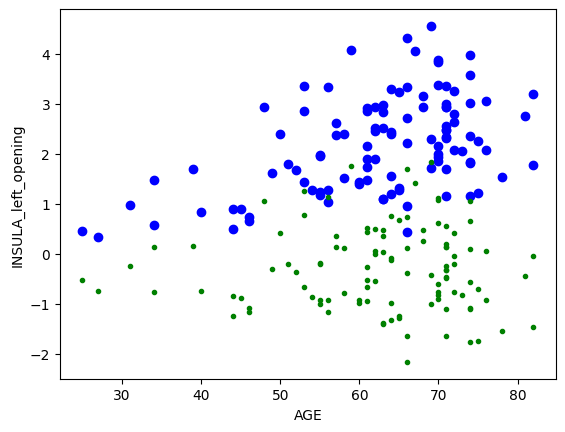

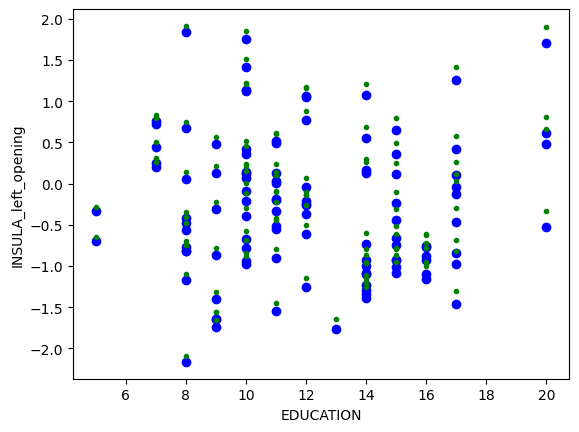

In [15]:
var4Cov=['AGE','EDUCATION']#,'Gender_1M_0F']
val_tot = df_sulcus[col_list].join(clinical_data, how='left')
lbr.regress_covar_func(col_list,var4Cov,val_tot,val_tot,True)

for groupUsed in ['GROUPE','SOUS_GROUPE'] :
    print(f"welsh anova")
    for col in col_list :
        print(f"#######\ntest de normalité et d'homoscédasticité pour chaque groupe : {groupUsed} \n#######\n ")
        pg.print_table(pg.normality(val_tot, group=groupUsed, dv=col), floatfmt='.3f')
        pg.print_table(pg.homoscedasticity(val_tot, group=groupUsed, dv=col), floatfmt='.3f')        
        resANOVA=pg.welch_anova(data=val_tot, dv=col, between=groupUsed)

        #lbr.regress_covar_func(col_list,var4Cov,val_tot,val_tot,True)     
        #lbr.regress_covar_func(col_list,var4Cov,val_tot,val_tot,True)     
        k = val_tot[groupUsed].nunique()  # Number of groups
        n = val_tot.shape[0] / k  # Number of observations per group
        achieved_power = pg.power_anova(eta_squared=resANOVA.loc[0, 'np2'], k=k, n=n, alpha=0.05)
        print('Achieved power: %.4f' % achieved_power)
        #pg.anova(data=val_tot,dv=col,between=groupUsed,detailed=True)
        print(f"\nGroup used :",*val_tot[groupUsed].unique(),"\n",resANOVA)
        if (resANOVA.np2[0] < 0.05):
            posthoc = pg.pairwise_tukey(data=val_tot, dv=col, between=groupUsed)
            #pg.pairwise_tests(data=val_tot, dv=col, between=groupUsed, subject='Subject',parametric=True, padjust='fdr_bh', effsize='hedges')
            pg.print_table(posthoc, floatfmt='.3f')

# 1. Analyse des sillons par Brainvisa

## 1.1 Première étude 

In [16]:
#df_etude1_scoreAndCov=clinical_data.where(clinical_data['ETUDE1_IRM'].dropna() == 'oui')
df_etude1_scoreAndCov=clinical_data[clinical_data['ETUDE1_IRM'] == "oui"]

df_etude1_scoreAndCov_index=df_etude1_scoreAndCov.index.dropna()

df_etude1_sulcus = df_sulcus[df_sulcus.index.isin(df_etude1_scoreAndCov_index)]

var4Corr_scoresNeurpsy=['FER','mFP','mFP_SocialContext','mFP_Mentalizing','mFP_Controls','Praxies','Denomition','FCSRT_RL','FCSRT_RT','TOP10']
var4Corr_typeErreurs=['FER_EVC','FER_EVN','mFP_IDK','mFP_WrongC','mFP_WrongFP','mFP_Norm','mFP_Altertive','mFP_Irrelevant','mFP_Jugmental','mFP_Consequences','mFP_Malicious','mFP_Undermentalizing','mFP_Intentiol','mFP_WrongEmot','mFP_NoEmot']
var4Corr=var4Corr_scoresNeurpsy+var4Corr_typeErreurs
var4Cov=['AGE','EDUCATION']#,'Gender_1M_0F']


In [17]:
var4CorrNormMinMax = [x+'NormMinMax' for x in var4Corr]
var4CorrNormZScore = [x+'NormZScore' for x in var4Corr]
var4CovNormMinMax = [x+'NormMinMax' for x in var4Cov]
var4CovNormZScore = [x+'NormZScore' for x in var4Cov]
lbr.MinMax_func(var4Corr+var4Cov,clinical_data)
lbr.ZScore_func(var4Corr+var4Cov,clinical_data)

KeyError: 'Denomition'

In [18]:
import warnings
warnings.filterwarnings('ignore')
reload(lbr)
plt.tight_layout()

La bibil à RORO loaded


<Figure size 640x480 with 0 Axes>

### 1.1.1 Contrastes de groupes et sous-groupes

In [19]:
pretty_list = '\n ° '.join(col_list)
print(f"\033[1;34m {len(col_list)} variables testées (Sillon+lateralité+caractéristique) :\n ° {pretty_list}\033[0m")  

for groupUsed in ['GROUPE','SOUS_GROUPE'] :
#for groupUsed in ['GROUPE'] :
    print(f"\033[1;31m *****************************\n{groupUsed}\n***************************** \033[0m")
    # Obtenez toutes les valeurs uniques dans la colonne 'group'
    #unique_values = df_etude1[groupUsed].dropna().unique()
    
    lbr.test_covar_funcWithANOVA(var4Cov,df_etude1_scoreAndCov,groupUsed)
    
    # Obtenez tous les couples possibles des valeurs uniques dans la colonne 'group'
    pairs = list(combinations(df_etude1_scoreAndCov[groupUsed].dropna().unique(), 2))
    for pair in pairs: # Itérez sur tous les couples
        print(f"\033[1;31m**\n{pair}\n**\033[0m")
        #val=df_etude1_sulcus.loc["SIL001"]['INSULA_right_opening']
        #print(f"dans df_etude1_sulcus : {val}")
        ssdf = df_etude1_sulcus.loc[df_etude1_scoreAndCov[groupUsed].isin([pair[0],pair[1]])]
        #print(ssdf.shape,ssdf[col_list].dropna(axis=0).shape,ssdf[col_list].dropna(axis=1).shape)
        #val=ssdf.loc["SIL001"]['INSULA_right_opening']
        #print(f"dans ssdf : {val}")
        ssdf=ssdf[col_list].dropna(axis=1)
        print(ssdf.join(df_etude1_scoreAndCov.loc[ssdf.index][groupUsed])[groupUsed].value_counts())
        for elt in set(col_list)-set(ssdf.columns):
            colonne_label = lut_names.loc[lut_names['brainvisa_acronym'] == elt.split('_')[0]+"_"+elt.split('_')[1], 'label']
            print(colonne_label.iloc[0])
    
        if (len(var4Cov)>0):
            lbr.test_covar_funcOnTwoGroups(var4Cov,df_etude1_scoreAndCov,groupUsed,pair[0],pair[1])
            
        if (len(var4Cov)>0):
            lbr.regress_covar_func(ssdf.columns,var4Cov,ssdf,df_etude1_scoreAndCov.loc[df_etude1_scoreAndCov.index.isin(ssdf.index)],True)     
                  
        g1=ssdf.loc[df_etude1_scoreAndCov[groupUsed] == pair[0]][ssdf.columns] 
        g2=ssdf.loc[df_etude1_scoreAndCov[groupUsed] == pair[1]][ssdf.columns] 
        p_values = [ttest_ind(g1[col].values,g2[col].values,equal_var=False) for col in ssdf.columns]
        pvalue_list = [result.pvalue for result in p_values]
        b_fdr,p_fdr=sm.stats.fdrcorrection(pvalue_list,alpha=0.05,method='indep',is_sorted=False)
        p_val_corr_tri = sorted(zip(p_values, [elt.replace("NormZScore","") for elt in ssdf.columns],b_fdr))

        print(f"\033[1;32m {np.sum(b_fdr)} sillon(s) sur {len(ssdf.columns)} significativement différents \033[0m")
        for elt in p_val_corr_tri :
            if elt[2]:
                colonne_label = lut_names.loc[lut_names['brainvisa_acronym'] == elt[1].split('_')[0]+"_"+elt[1].split('_')[1], 'label']
                print(f"{colonne_label.values[0]}, p(FDR) = {round(elt[0].pvalue,4)}")
                
                if True:#(p_val_corr_tri[0][1]==elt[1]):
                    plt.figure()
                    #print(ssdf.join(df_etude1_scoreAndCov.loc[ssdf.index][groupUsed]).groupby(groupUsed)['INSULA_right_opening'].mean())
                    sns.stripplot(ssdf.join(df_etude1_scoreAndCov.loc[ssdf.index][groupUsed]),y=elt[1],x=groupUsed,size=3,color="red")
                    ax=sns.violinplot(ssdf.join(df_etude1_scoreAndCov.loc[ssdf.index][groupUsed]),y=elt[1],x=groupUsed#,palette="muted")
                    plt.title(colonne_label.values[0]+" $p_{fdr}$ = "+str(np.round(elt[0].pvalue,5)))
                    plt.ylabel(elt[1].split('_')[2]+" (mm)") 
                      

SyntaxError: '(' was never closed (2728880060.py, line 51)

### 1.1.2 Corrélations scores neuropsychologiques

Nombre de sujets : 5
Sulcus        Clinical data           
mFP_Controls  S.F.inter._right_opening    0.515285
TOP10         S.F.inf._left_opening      -0.763088
dtype: float64


<Figure size 640x480 with 0 Axes>

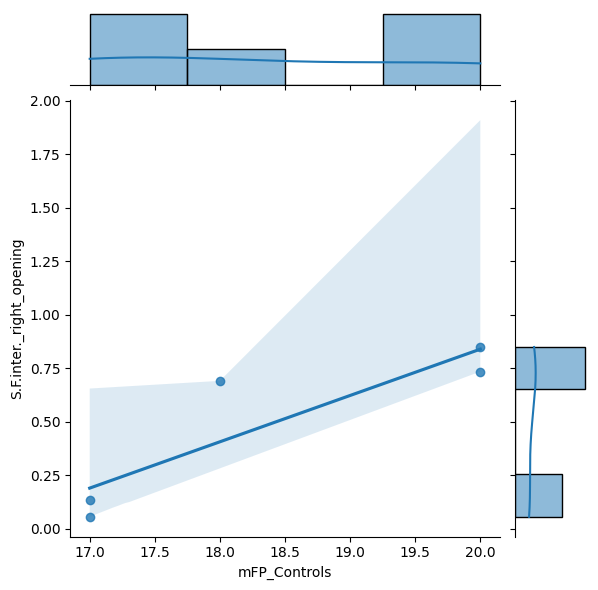

<Figure size 640x480 with 0 Axes>

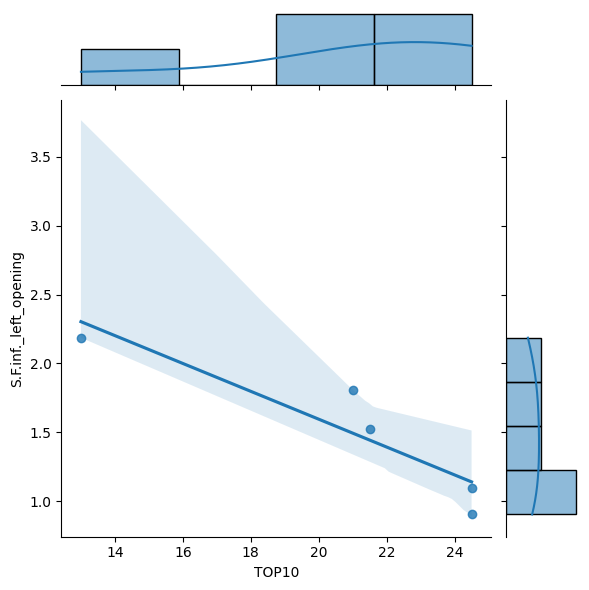

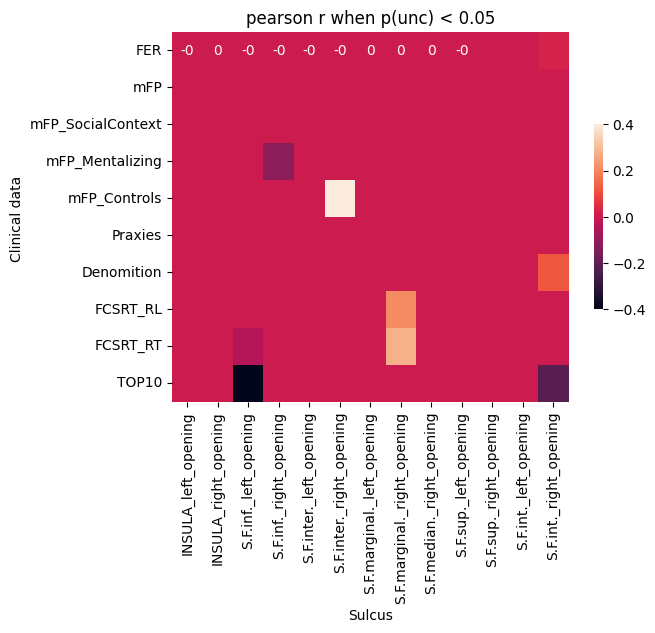

In [ ]:
lbr.corr_sillons_var_func(ssdf.columns,var4Corr_scoresNeurpsy,ssdf,clinical_data)

### 1.1.3 Corrélations type d’erreurs 

Nombre de sujets : 15
Sulcus          Clinical data              
FER_EVN         S.F.int._left_opening         -0.503513
mFP_WrongFP     S.F.inter._left_opening        0.636014
mFP_Irrelevant  S.F.inter._left_opening        0.712482
mFP_Jugmental   S.F.sup._left_opening          0.555818
                S.F.sup._right_opening         0.554189
                S.F.int._right_opening         0.777933
mFP_Malicious   S.F.median._right_opening      0.523754
mFP_WrongEmot   S.F.int._right_opening         0.564230
mFP_NoEmot      S.F.marginal._right_opening    0.529789
                S.F.int._right_opening         0.625677
dtype: float64


<Figure size 640x480 with 0 Axes>

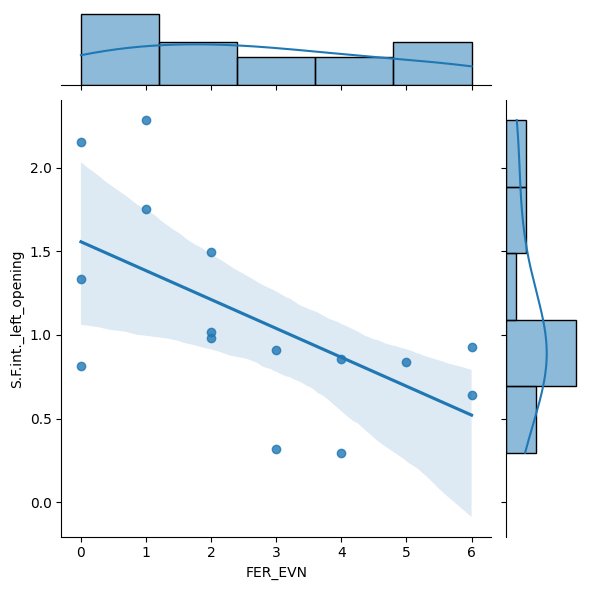

<Figure size 640x480 with 0 Axes>

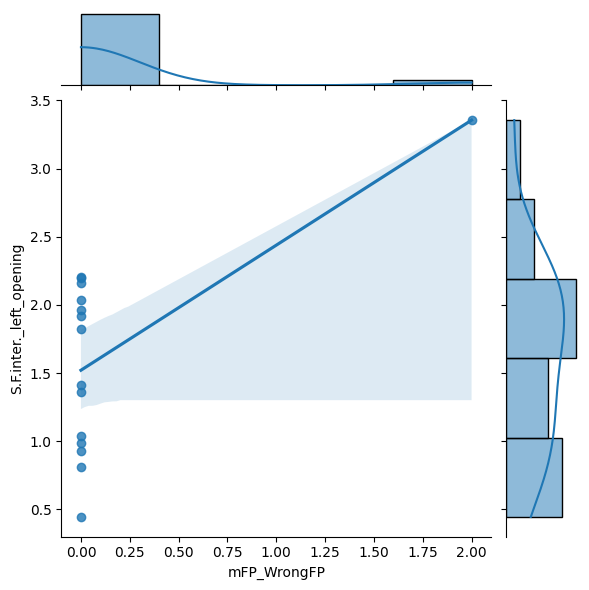

<Figure size 640x480 with 0 Axes>

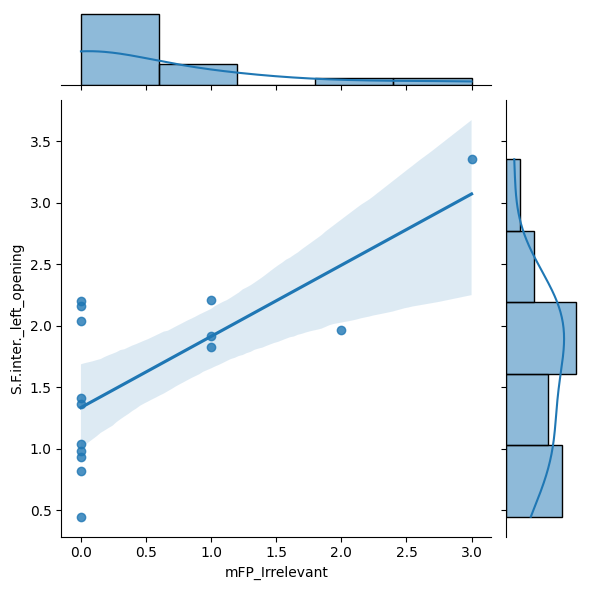

<Figure size 640x480 with 0 Axes>

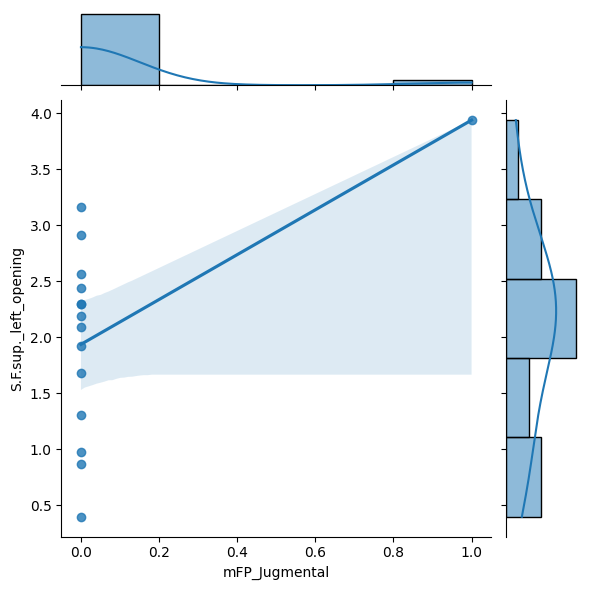

<Figure size 640x480 with 0 Axes>

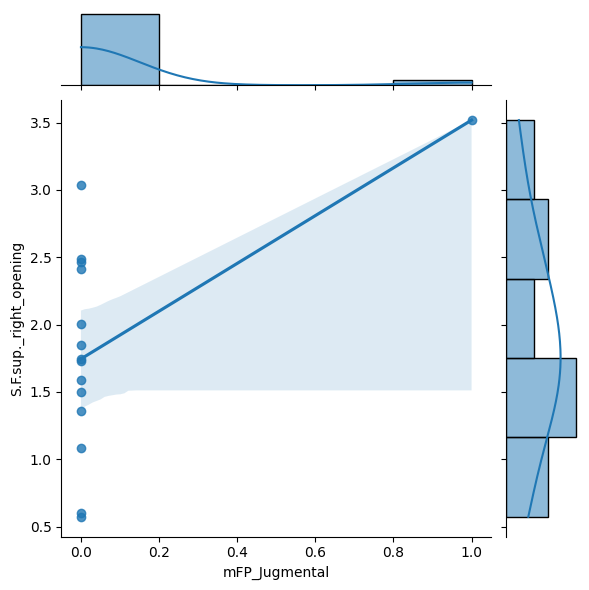

<Figure size 640x480 with 0 Axes>

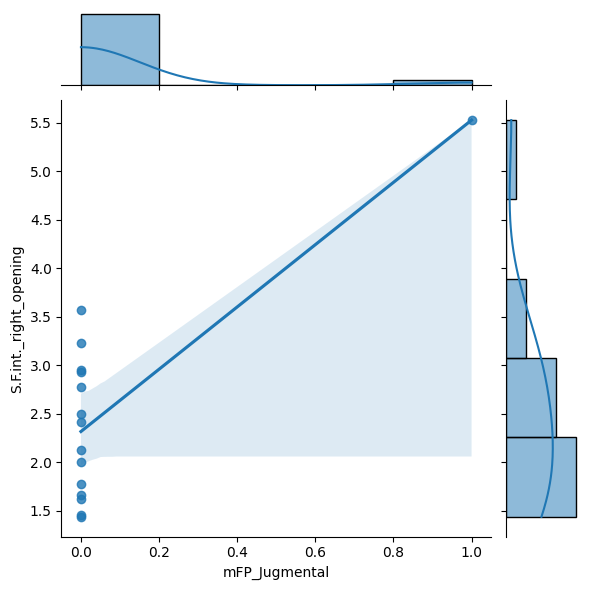

<Figure size 640x480 with 0 Axes>

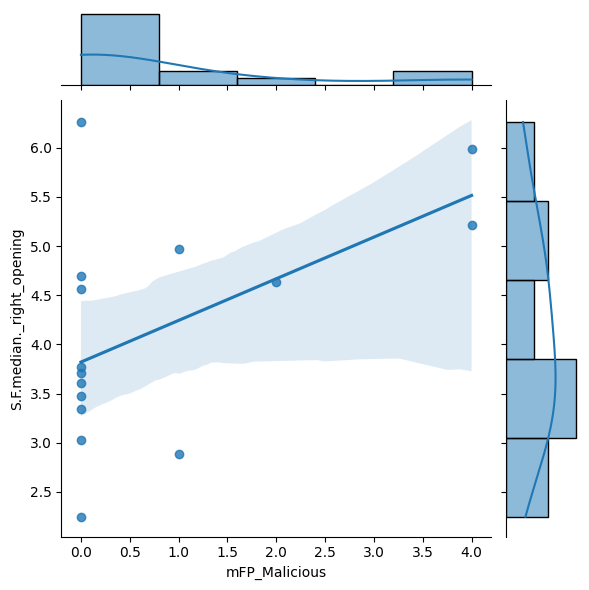

<Figure size 640x480 with 0 Axes>

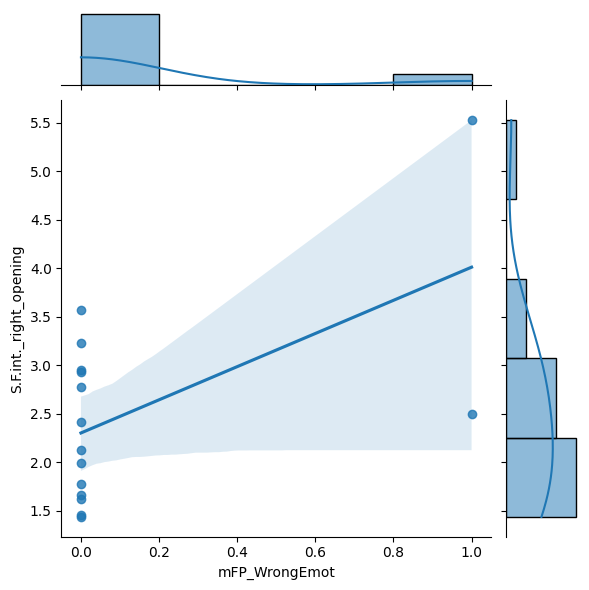

<Figure size 640x480 with 0 Axes>

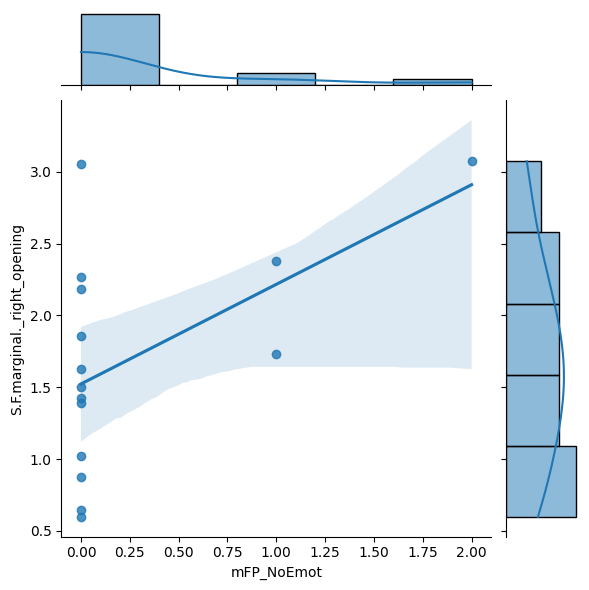

<Figure size 640x480 with 0 Axes>

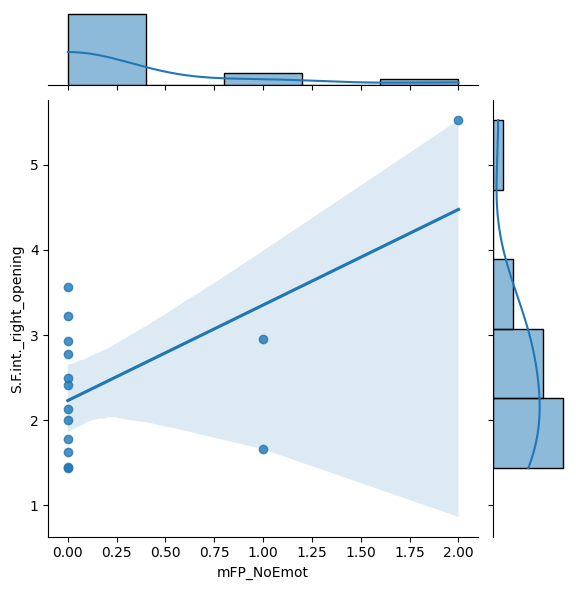

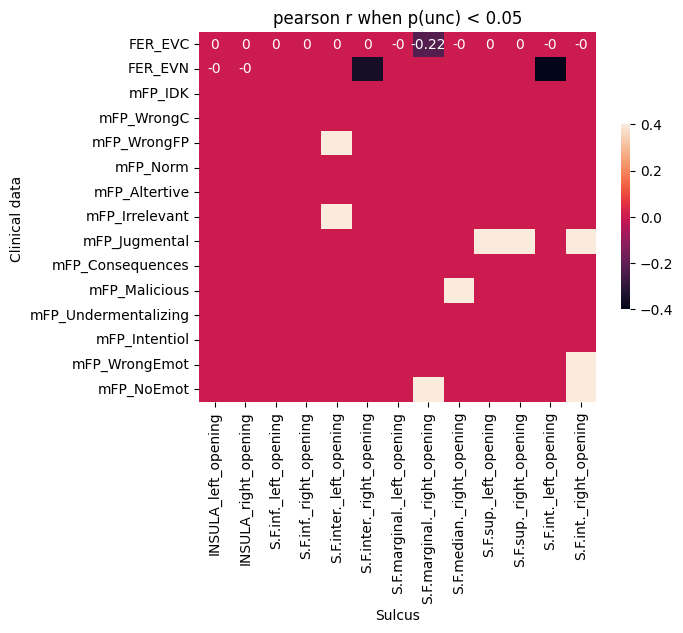

In [ ]:
lbr.corr_sillons_var_func(ssdf.columns,var4Corr_typeErreurs,ssdf,clinical_data)

## 1.2 Deuxième étude 

In [ ]:
#df_etude2_scoreAndCov_index=clinical_data.where(clinical_data['ETUDE2_IRM']=='oui')['ETUDE2_IRM'].dropna().index.dropna()
df_etude2_scoreAndCov=clinical_data[clinical_data['ETUDE2_IRM'] == "oui"]
df_etude2_scoreAndCov_index=df_etude1_scoreAndCov.index.dropna()

df_etude2_scoreAndCov=clinical_data.loc[df_etude2_scoreAndCov_index]
df_etude2_sulcus = df_sulcus[df_sulcus.index.isin(df_etude2_scoreAndCov_index)]

var4Corr_scoresNeurpsy=['GREMOT_LS','GREMOT_LS_Pragmatique','GREMOT_FluVerbes','GREMOT_FluFruits','GREMOT_FluLettres','GREMOT_DenoObjets','GREMOT_DenoVerbes','GREMOT_DenoPersonnes','GREMOT_Discoursnarratif','GREMOT_CompSynt','GREMOT_VerifOP','GREMOT_VerifEP']
var4Corr_Frequence=['LS_Frequence','DN_Frequence']
var4Corr_Fluence=['CATEGORIAL_Total_Clu_Size','CATEGORIAL_Clus_Number','CATEGORIAL_Mean_Cluster_Size','CATEGORIAL_PERCTGE_Clu','CATEGORIAL_Switch','LITTERAL_Total_Clu_Size','LITTERAL_Clus_Number','LITTERAL_Mean_Cluster_Size','LITTERAL_PERCTGE_Clu','LITTERAL_Switch']
var4Corr=var4Corr_scoresNeurpsy+var4Corr_Frequence+var4Corr_Fluence

### 1.2.1 Corrélations scores neuropsychologiques

Nombre de sujets : 12
Sulcus                 Clinical data             
GREMOT_LS              S.F.marginal._left_opening   -0.688788
GREMOT_LS_Pragmatique  S.F.marginal._left_opening   -0.682417
GREMOT_DenoPersonnes   S.F.inter._left_opening      -0.436167
                       S.F.inter._right_opening     -0.423693
                       S.F.sup._left_opening        -0.607248
dtype: float64


<Figure size 640x480 with 0 Axes>

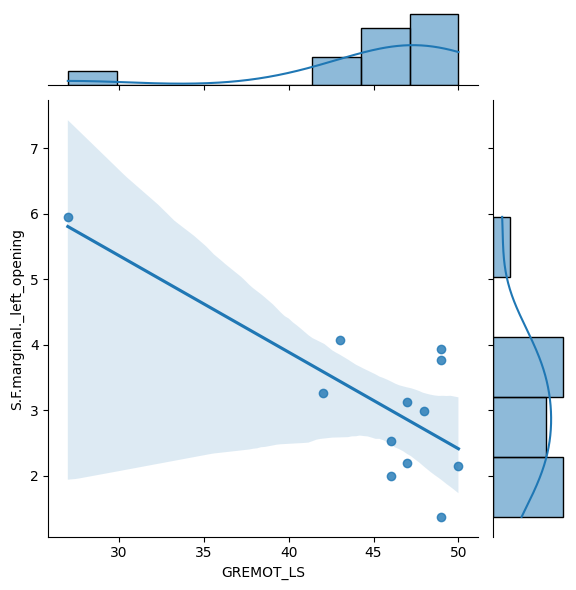

<Figure size 640x480 with 0 Axes>

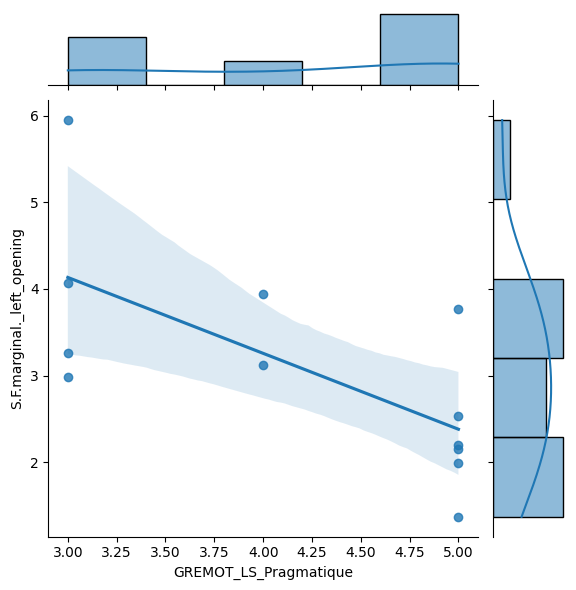

<Figure size 640x480 with 0 Axes>

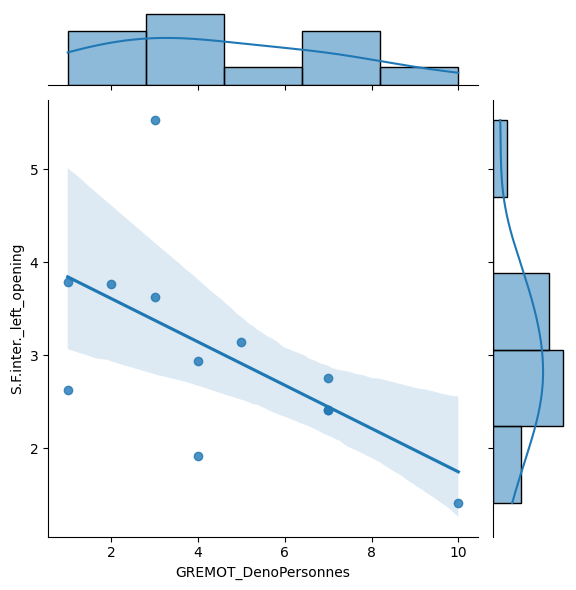

<Figure size 640x480 with 0 Axes>

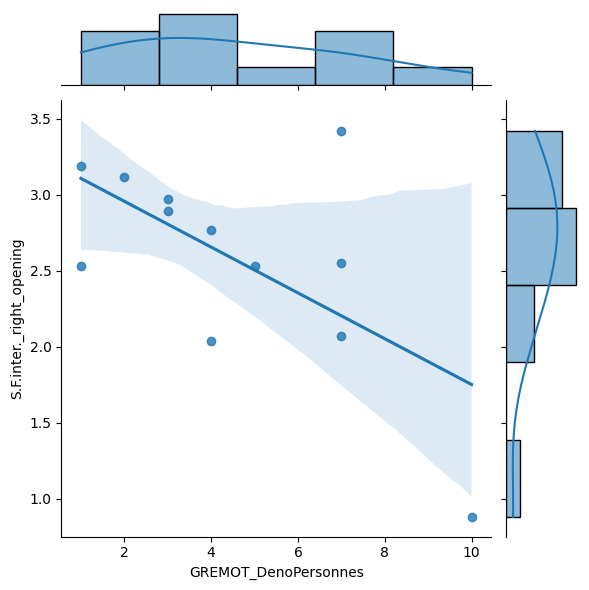

<Figure size 640x480 with 0 Axes>

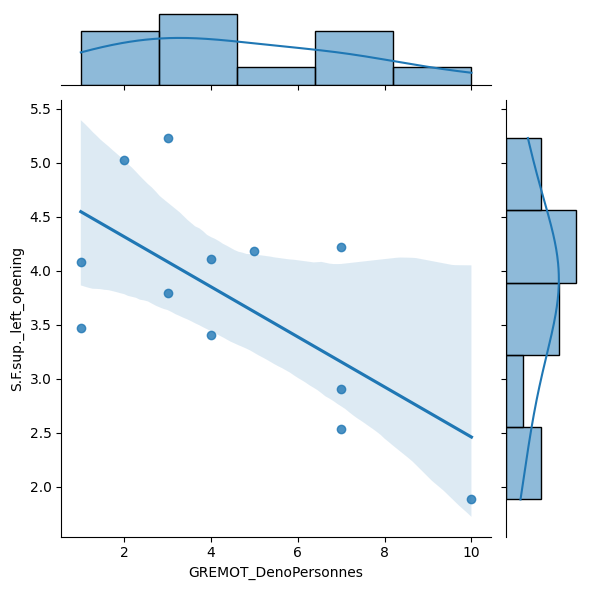

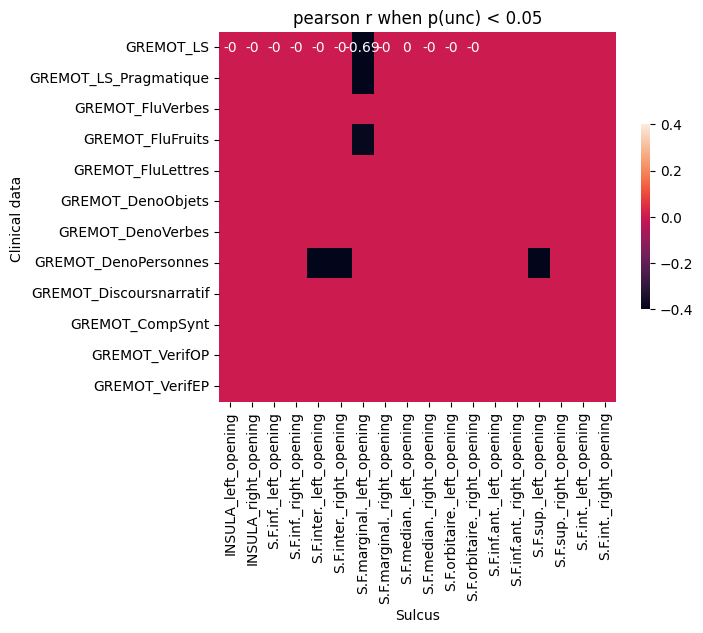

In [ ]:
lbr.corr_sillons_var_func(col_list,var4Corr_scoresNeurpsy,df_etude2_sulcus,df_etude2_scoreAndCov)

### 1.2.2 Corrélations fréquence vocale fondamentale

Nombre de sujets : 12
Sulcus        Clinical data             
LS_Frequence  S.F.marginal._left_opening    0.418150
DN_Frequence  S.F.median._left_opening      0.518203
              S.F.int._left_opening         0.540976
dtype: float64


<Figure size 640x480 with 0 Axes>

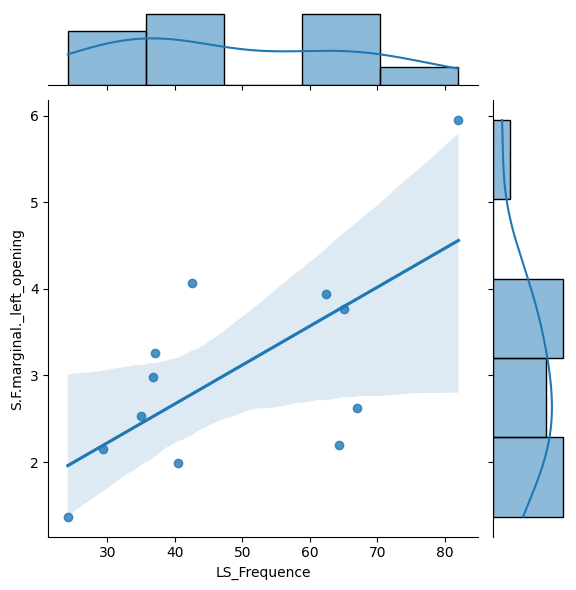

<Figure size 640x480 with 0 Axes>

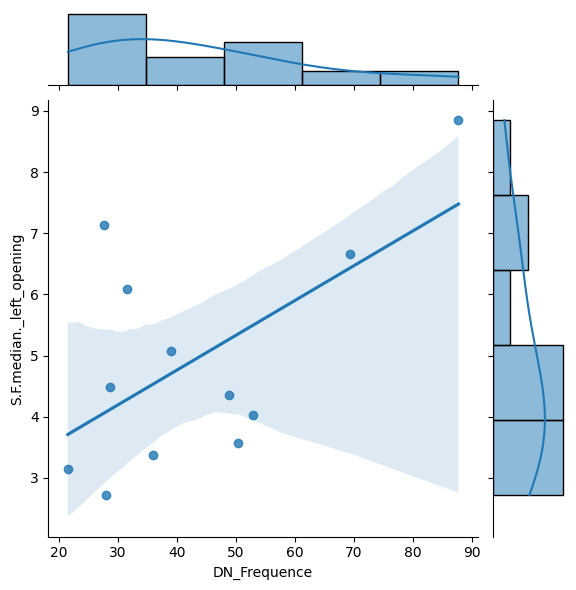

<Figure size 640x480 with 0 Axes>

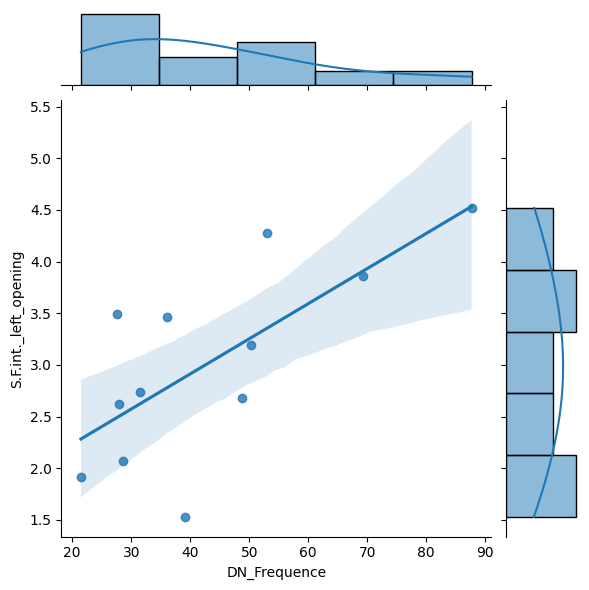

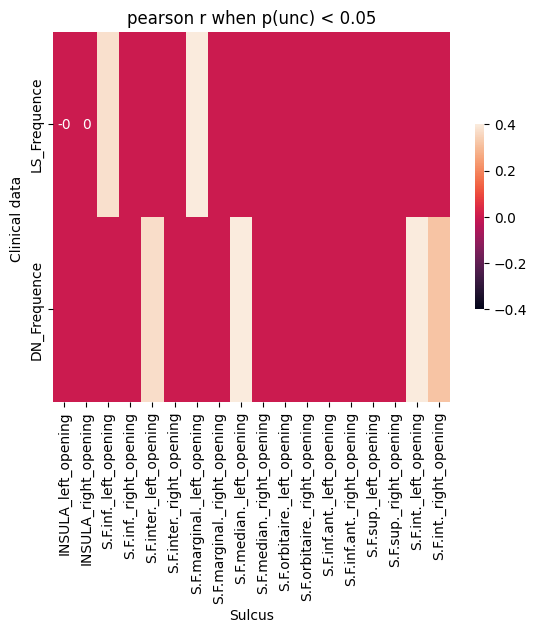

In [ ]:
lbr.corr_sillons_var_func(col_list,var4Corr_Frequence,df_etude2_sulcus,df_etude2_scoreAndCov)

Nombre de sujets : 14
Sulcus                        Clinical data              
CATEGORIAL_Mean_Cluster_Size  S.F.marginal._right_opening    0.484882
                              S.F.inf.ant._left_opening      0.704226
CATEGORIAL_Switch             S.F.sup._left_opening         -0.434793
dtype: float64


<Figure size 640x480 with 0 Axes>

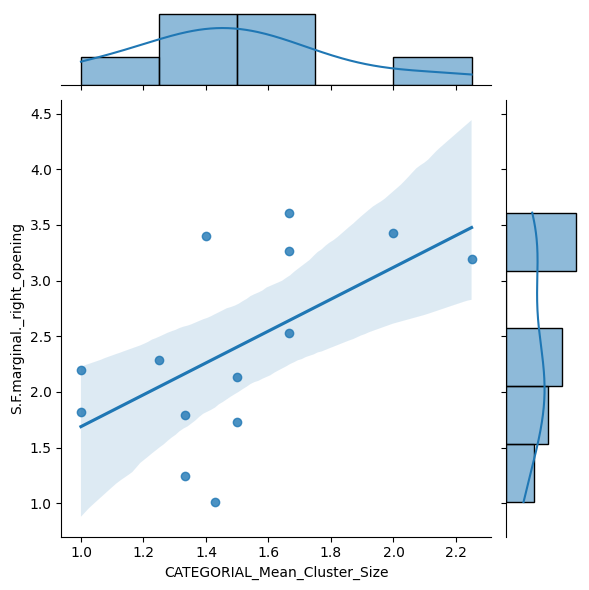

<Figure size 640x480 with 0 Axes>

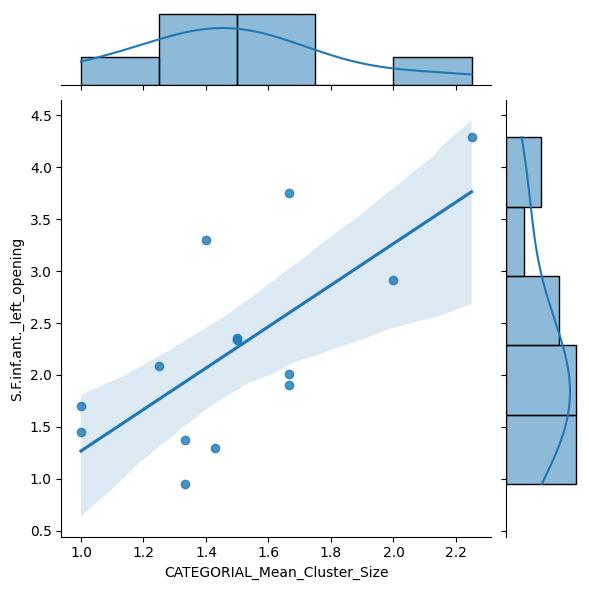

<Figure size 640x480 with 0 Axes>

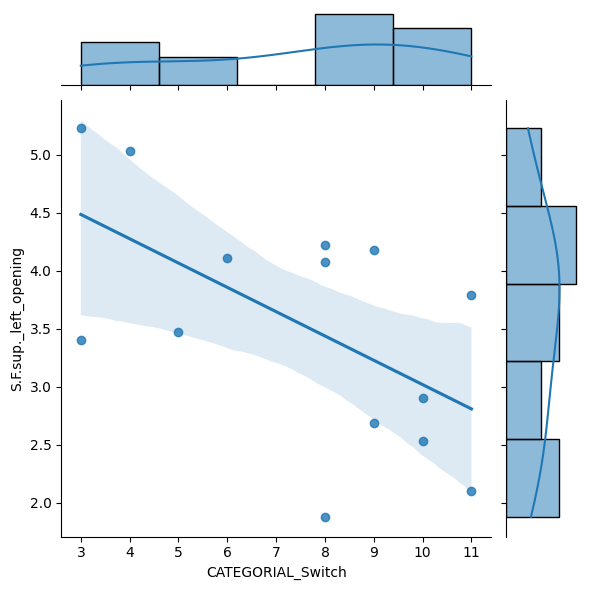

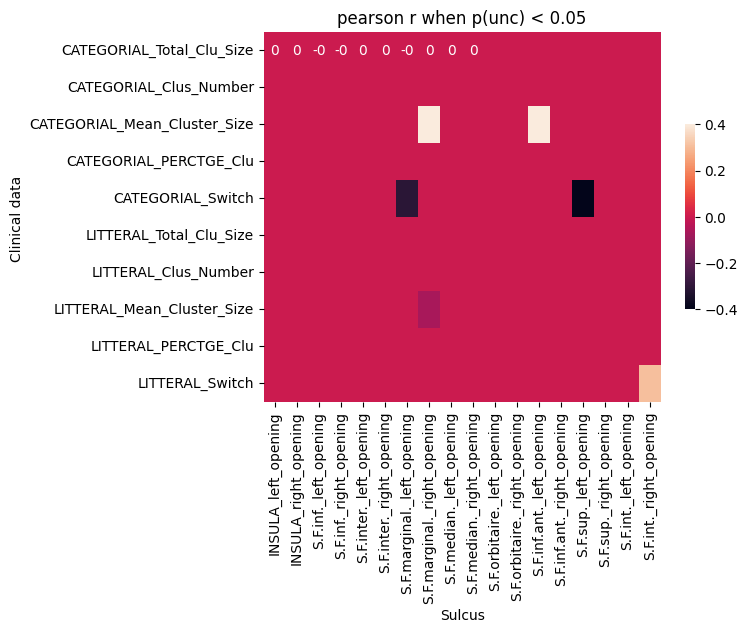

In [ ]:
lbr.corr_sillons_var_func(col_list,var4Corr_Fluence,df_etude2_sulcus,df_etude2_scoreAndCov)

# 2. Analyse de l'épaisseur corticale

In [ ]:
from brainstat.datasets import fetch_mask, fetch_template_surface,fetch_parcellation
from brainspace.mesh.mesh_io import read_surface
from brainstat.stats.SLM import SLM
from brainstat.stats.terms import FixedEffect

glasser = fetch_parcellation("fsaverage5", "glasser", 360)
pial_left, pial_right = fetch_template_surface("fsaverage5",layer="pial",join=False)
inflated_left, inflated_right = fetch_template_surface("fsaverage5",layer="inflated",join=False)
pial_combined = fetch_template_surface("fsaverage5", join=True)
pial_combined_fslr32k = fetch_template_surface("fslr32k", join=True)
pial_left_fslr32k, pial_right_fslr32k = fetch_template_surface("fslr32k", join=False)
inflated_left_fslr32k,inflated_right_fslr32k = fetch_template_surface("fslr32k",layer="inflated", join=False)
mask = fetch_mask("fsaverage5")

In [ ]:
print(f"La surface utilisée est fsaverage5 avec {pial_combined.GetNumberOfPoints()} points")
print(f"tandis que la fsaverage standard comporte {pial_combined_fslr32k.GetNumberOfPoints()} points")

La surface utilisée est fsaverage5 avec 20484 points
tandis que la fsaverage standard comporte 64984 points


## 2.1 Première étude 

In [ ]:
#df_etude1_scoreAndCov=clinical_data.where(clinical_data['ETUDE1_IRM'].dropna() == 'oui')
df_etude1_scoreAndCov=clinical_data[clinical_data['ETUDE1_IRM'] == "oui"]
df_etude1_scoreAndCov = df_etude1_scoreAndCov.loc[df_etude1_scoreAndCov.index.dropna()]
df_etude1_scoreAndCov_index

#df_etude1_scoreAndCov_index=df_etude1_scoreAndCov.index.dropna()

Index(['c06p0001', 'c06p0002', 'c06p0003', 'c06p0004', 'c06p0005', 'c06p0006',
       'c06p0007', 'c06p0008', 'c06p0009', 'c06p0010',
       ...
       'PSY110', 'SIL001', 'PSY111', 'PSY112', 'PSY113', 'PSY114', 'PSY116',
       'PSY119', 'PSY120', 'PSY121'],
      dtype='object', name='ID_IRM', length=126)

In [ ]:
valCT=[]
for elt in df_etude1_scoreAndCov.index:
    sub=f"sub-{str(elt)}"
    if elt.startswith("PSY") :
        path_file_lh=os.path.join(DERIVATIVE_DIR1,"micapipe_v0.2.0",sub,"ses-1","maps",sub+"_ses-1_hemi-L_surf-fsaverage5_label-thickness_sm11.func.gii")
        path_file_rh=os.path.join(DERIVATIVE_DIR1,"micapipe_v0.2.0",sub,"ses-1","maps",sub+"_ses-1_hemi-R_surf-fsaverage5_label-thickness_sm11.func.gii")
    else :
        path_file_lh=os.path.join(DERIVATIVE_DIR2,"micapipe_v0.2.0",sub,"ses-1","maps",sub+"_ses-1_hemi-L_surf-fsaverage5_label-thickness_sm11.func.gii")
        path_file_rh=os.path.join(DERIVATIVE_DIR2,"micapipe_v0.2.0",sub,"ses-1","maps",sub+"_ses-1_hemi-R_surf-fsaverage5_label-thickness_sm11.func.gii")
    if os.path.exists(path_file_lh) and os.path.exists(path_file_rh):
        tmp_rh=nib.load(path_file_rh) 
        tmp_lh=nib.load(path_file_lh)
        volumeG1 = np.concatenate([tmp_lh.darrays[0].data,tmp_rh.darrays[0].data], axis=0)
        valCT.append(volumeG1)
    else :
        df_etude1_scoreAndCov.drop(elt,inplace=True)
        print(sub)
       
#df_etude1_CT = pd.DataFrame(zscore(np.array(valCT),axis=1), index=df_etude1_scoreAndCov.index)       
df_etude1_CT = pd.DataFrame(np.array(valCT), index=df_etude1_scoreAndCov.index)       
print(f"{df_etude1_CT.shape[0]} sujets")

88 sujets


In [8]:
#Plot the average thickness of the left and right hemispheres on the fsaverage5 surface    
for groupUsed in ['GROUPE','SOUS_GROUPE'] :
    for gp in df_etude1_scoreAndCov[groupUsed].dropna().unique():
        figure_title=os.path.join(STUDY_PATH,"screenshots",f"CTSurface_groupscomparison_{groupUsed}_vs_{gp}.jpg")
#        labText=f"{np.sum(ssdf_covar[groupUsed] == pair[0])} {pair[0]}\n{np.sum(ssdf_covar[groupUsed] == pair[1])} {pair[1]}"
        plot_hemispheres(pial_left, pial_right,np.mean(df_etude1_CT.loc[df_etude1_scoreAndCov[groupUsed] == gp].values, axis=0), color_bar=True, color_range=(1.75, 3.25),
                label_text=[gp], cmap="viridis", embed_nb=True, size=(1400, 200), zoom=1.45,
                nan_color=(0.7, 0.7, 0.7, 1), transparent_bg=False,cb__labelTextProperty={"fontSize": 12}, interactive=True,screenshot=True, offscreen=False,filename=figure_title)
        #cmap="autumn",label_text=[labText],
        display(Image(filename=figure_title))

NameError: name 'df_etude1_scoreAndCov' is not defined

    ############/*                
        
        #print(f"\033[1;31m**\n{pair}\n**\033[0m")        
        #print(f"{np.sum(ssdf_covar[groupUsed] == pair[0])} {pair[0]}\n{np.sum(ssdf_covar[groupUsed] == pair[1])} {pair[1]}")                
        
            # Définir les termes du modèle pour les groupes ANX et NO_ANX
    term_group = FixedEffect(ssdf_covar[groupUsed])
    term_age = FixedEffect(ssdf_covar[var4Cov[0]])
    term_sex = FixedEffect(ssdf_covar[var4Cov[1]])
    term_subject = MixedEffect(ssdf_covar["SUBJ"])
    
    # Créer le modèle sans covariables
    model_group = term_group + term_subject
    model_group_age_sex = term_group
    */

### 2.1.1. Contrastes de groupes et sous-groupes

******************************
GROUPE
***************************** 


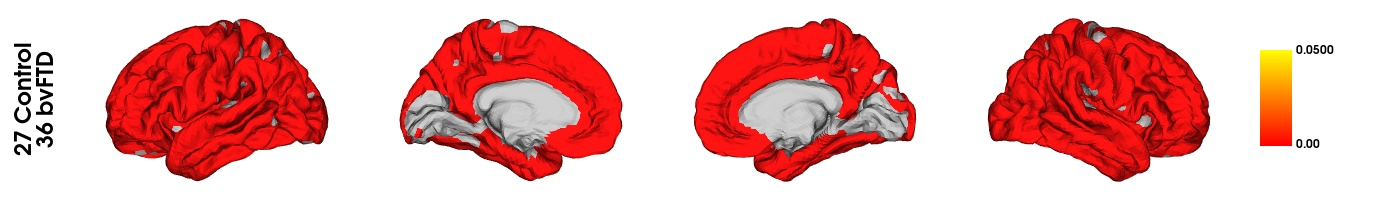

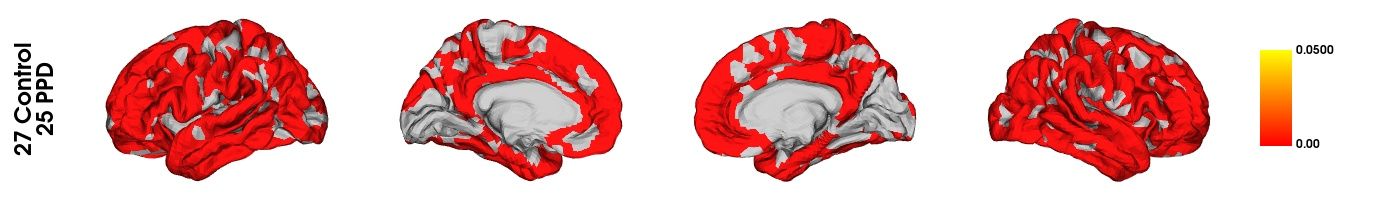

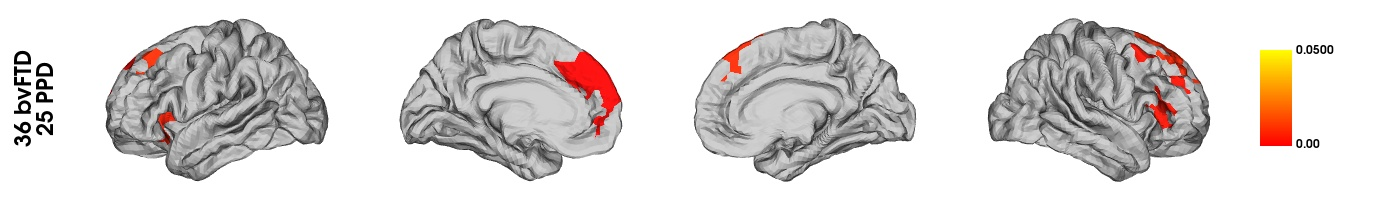

******************************
SOUS_GROUPE
***************************** 


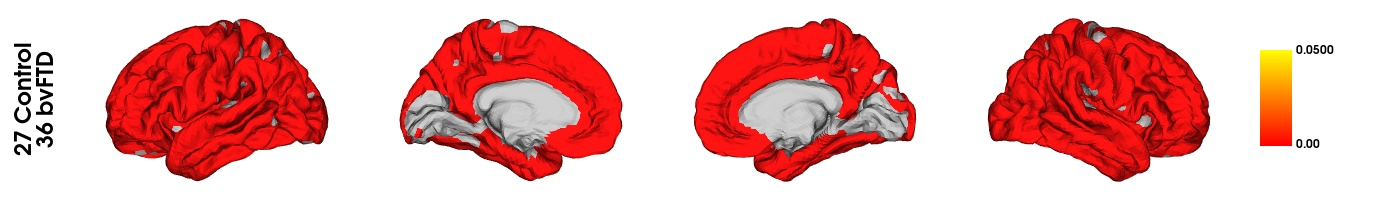

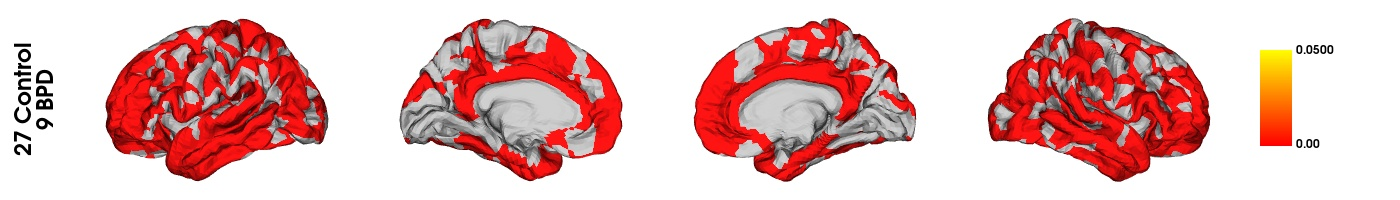

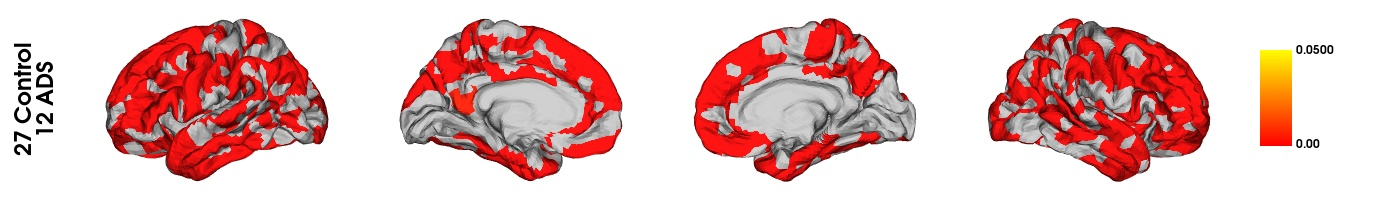

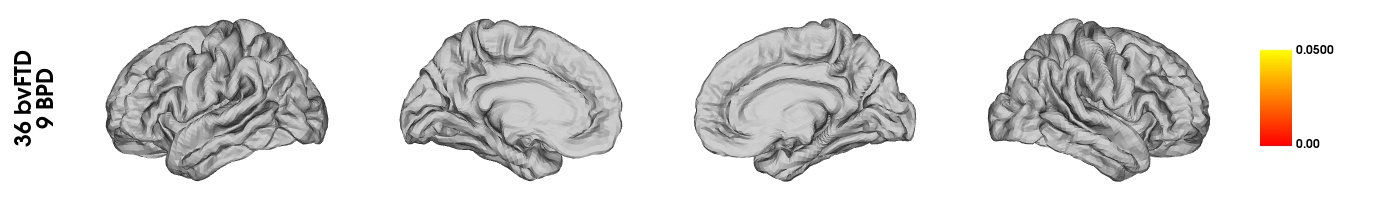

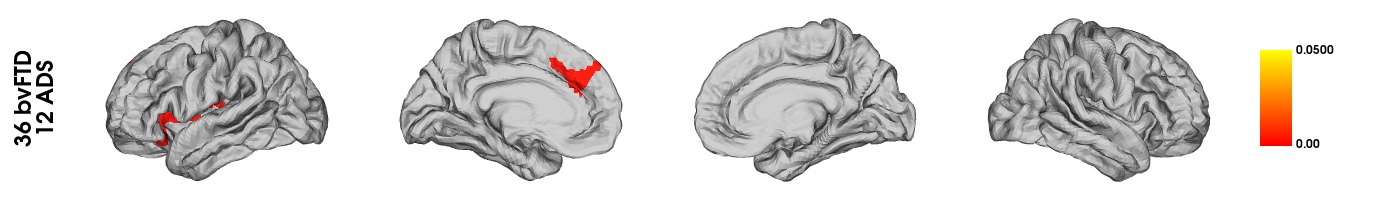

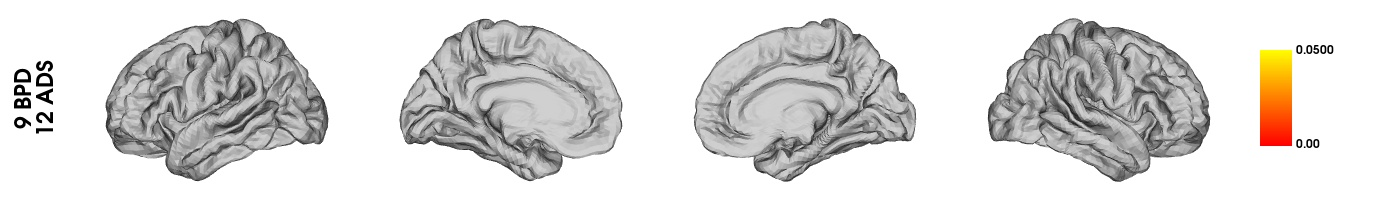

In [41]:
for groupUsed in ['GROUPE','SOUS_GROUPE'] :
    print(f"\033[1;31m******************************\n{groupUsed}\n***************************** \033[0m")  
    # Obtenez tous les couples possibles des valeurs uniques dans la colonne 'group'
    pairs = list(combinations(df_etude1_scoreAndCov[groupUsed].dropna().unique(), 2))
    for pair in pairs: # Itérez sur tous les couples
        
        #ssdf_covar = df_etude1_scoreAndCov.loc[df_etude1_scoreAndCov[groupUsed].isin([pair[0],pair[1]])]
        #ssdf_CT = df_etude1_CT.loc[df_etude1_scoreAndCov[groupUsed].isin([pair[0],pair[1]])]
        #print(ssdf.shape,ssdf[col_list].dropna(axis=0).shape,ssdf[col_list].dropna(axis=1).shape)
    
        ssdf_CT = df_etude1_CT.loc[df_etude1_scoreAndCov[groupUsed].isin([pair[0],pair[1]])]

        ssdf_covar = df_etude1_scoreAndCov.loc[ssdf_CT.index]
   
        contrast_group = (ssdf_covar[groupUsed] == pair[0]).astype(int) - (ssdf_covar[groupUsed] == pair[1]).astype(int)
        term_group = FixedEffect(ssdf_covar[groupUsed])
        
        model_group = term_group
        model_group_age_educ=model_group
        
        for varc in var4Cov:
            model_group_age_educ = model_group_age_educ + FixedEffect(ssdf_covar[varc])


    # Créer le modèle avec covariables
    #model_group_age_sex = term_group + term_age + term_sex + term_age * term_sex + term_subject
    ############
        slm_group = SLM(
            model_group_age_educ,
            contrast_group,
            surf=pial_combined,
            mask=mask,
            correction=["fdr", "rft"],
            two_tailed=True,
            cluster_threshold=0.01,
        )
        
        slm_group.fit(ssdf_CT.values)
        
        """lot_hemispheres(inflated_left,inflated_right, slm_group.t, color_bar=True, color_range=(-4, 4),
        label_text=["t-values"], cmap="viridis", embed_nb=True, size=(1400, 200), zoom=1.45,
        nan_color=(0.7, 0.7, 0.7, 1), transparent_bg=False,cb__labelTextProperty={"fontSize": 12}, interactive=False) """
        cp = [np.copy(slm_group.P["pval"]["C"])]
        [np.place(x, np.logical_or(x > 0.05, ~mask), np.nan) for x in cp]
        
        figure_title=os.path.join(STUDY_PATH,"screenshots",f"CTSurface_groupscomparison_{pair[0]}_vs_{pair[1]}.jpg")
        labText=f"{np.sum(ssdf_covar[groupUsed] == pair[0])} {pair[0]}\n{np.sum(ssdf_covar[groupUsed] == pair[1])} {pair[1]}"
        plot_hemispheres(pial_left, pial_right, cp[0].T,cmap="autumn",label_text=[labText],
                         color_bar=True, color_range=(0, 0.05),
                         embed_nb=True, size=(1400, 200),zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1),
                         cb__labelTextProperty={"fontSize": 12},
                         transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
        display(Image(filename=figure_title))

### 2.1.2 Corrélations scores neuropsychologiques

In [1]:
lbr.corr_surface_var_func(var4Corr_scoresNeurpsy,var4Cov,df_etude1_scoreAndCov,df_etude1_CT,os.path.join(STUDY_PATH,"screenshots"))

NameError: name 'lbr' is not defined

['FER_EVC', 'FER_EVN']

### 2.1.3. Corrélations type d’erreurs 

FER_EVC
82 values


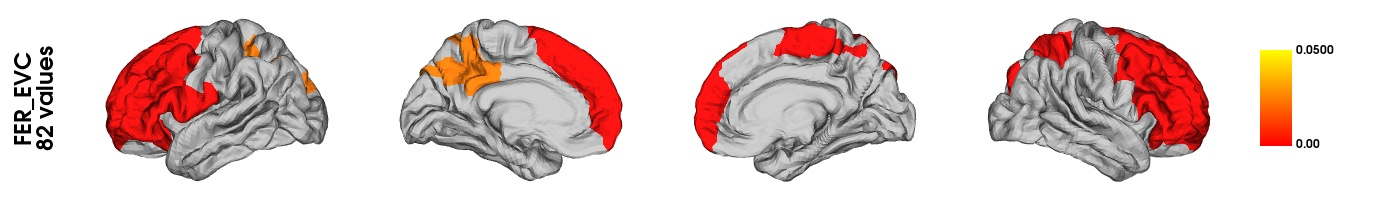

name : 2603 vertex
Coefficient de corrélation (Pearson) : -0.280 and p_value = 0.011
Coefficient de détermination aka Explained variance (R²) : 0.079
name : 2133 vertex
Coefficient de corrélation (Pearson) : -0.298 and p_value = 0.007
Coefficient de détermination aka Explained variance (R²) : 0.089
name : 786 vertex
Coefficient de corrélation (Pearson) : -0.236 and p_value = 0.033
Coefficient de détermination aka Explained variance (R²) : 0.056
name : 120 vertex
Coefficient de corrélation (Pearson) : -0.185 and p_value = 0.096
Coefficient de détermination aka Explained variance (R²) : 0.034
name : 41 vertex
Coefficient de corrélation (Pearson) : -0.161 and p_value = 0.150
Coefficient de détermination aka Explained variance (R²) : 0.026
name : 45 vertex
Coefficient de corrélation (Pearson) : -0.208 and p_value = 0.061
Coefficient de détermination aka Explained variance (R²) : 0.043
name : 58 vertex
Coefficient de corrélation (Pearson) : -0.205 and p_value = 0.064
Coefficient de détermin

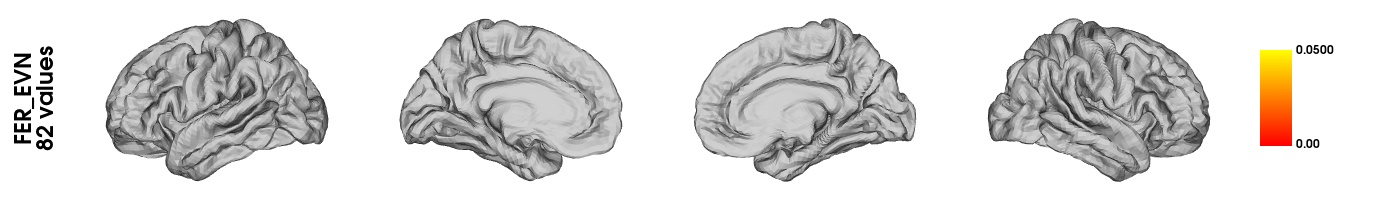

name : 639 vertex
Coefficient de corrélation (Pearson) : -0.302 and p_value = 0.006
Coefficient de détermination aka Explained variance (R²) : 0.091
name : 304 vertex
Coefficient de corrélation (Pearson) : -0.304 and p_value = 0.005
Coefficient de détermination aka Explained variance (R²) : 0.093


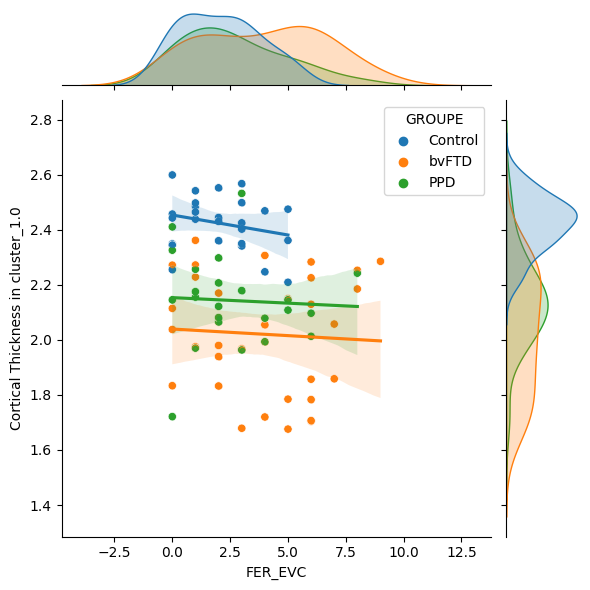

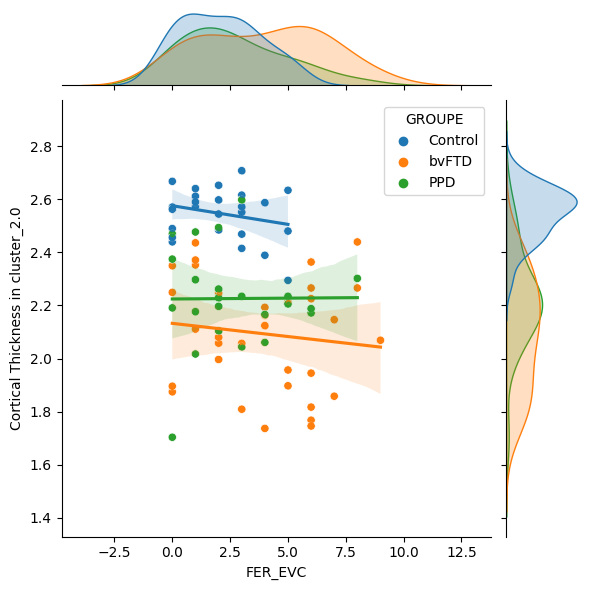

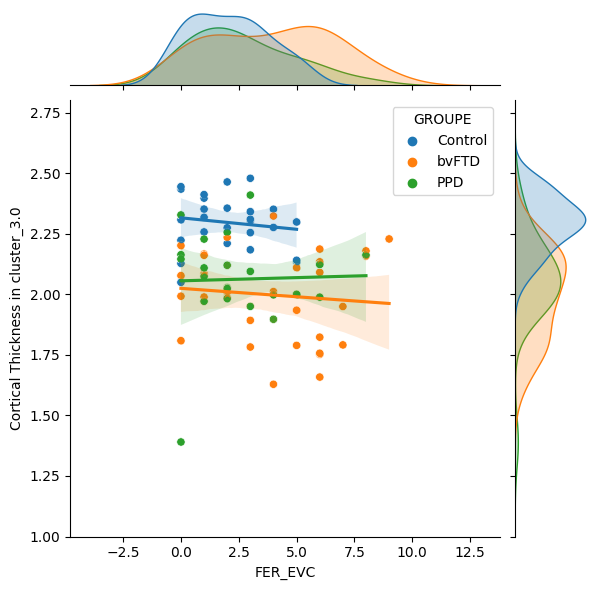

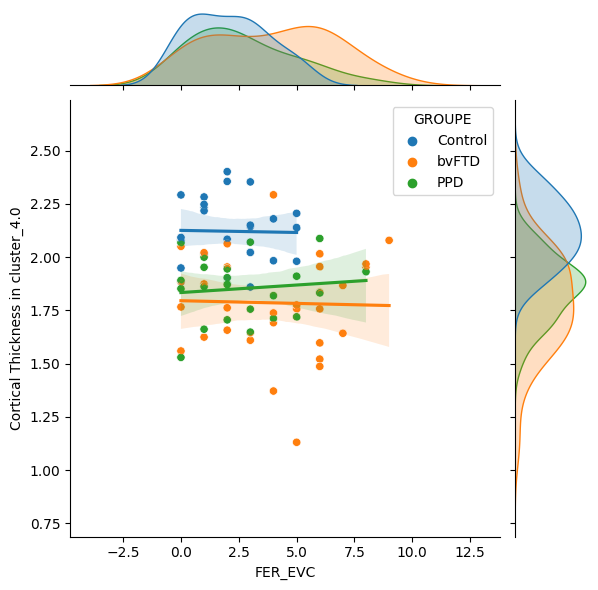

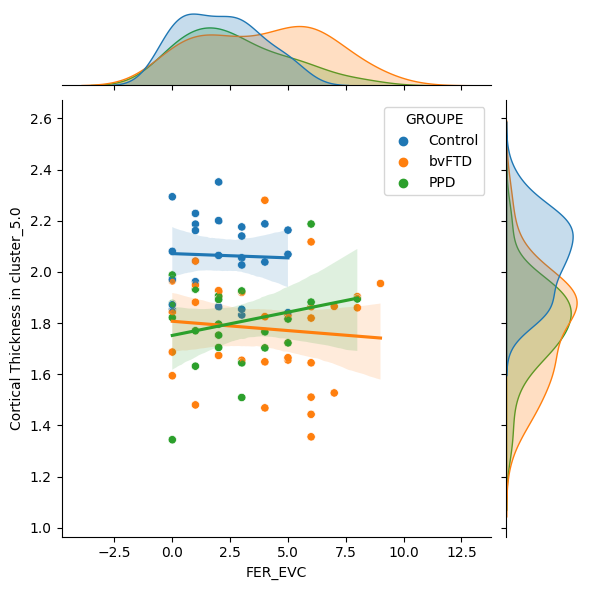

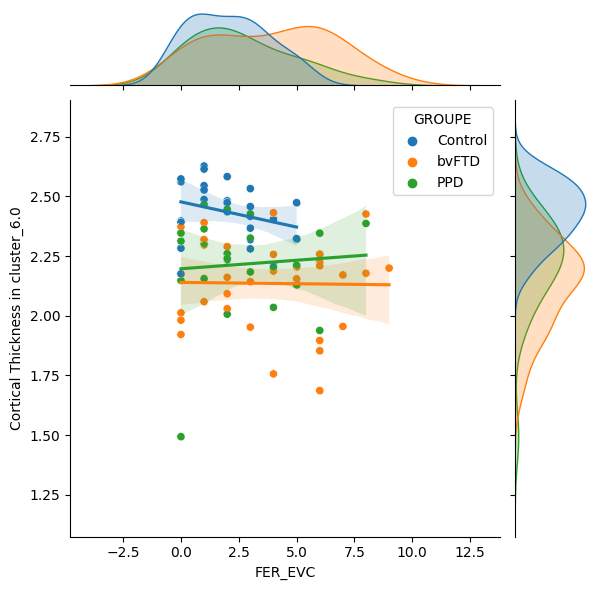

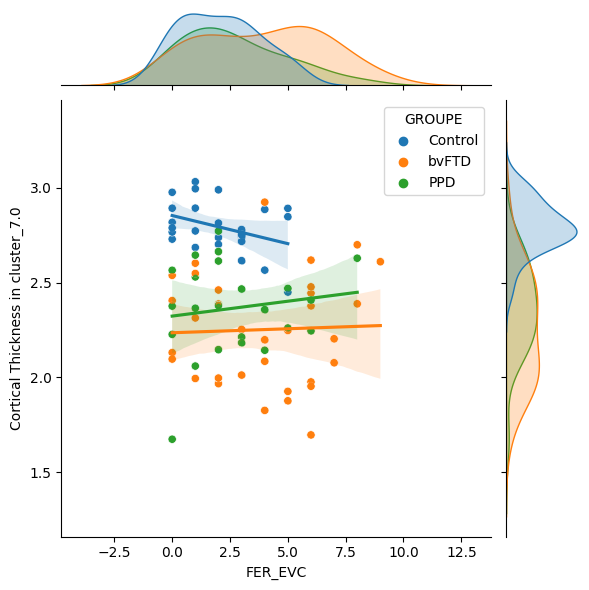

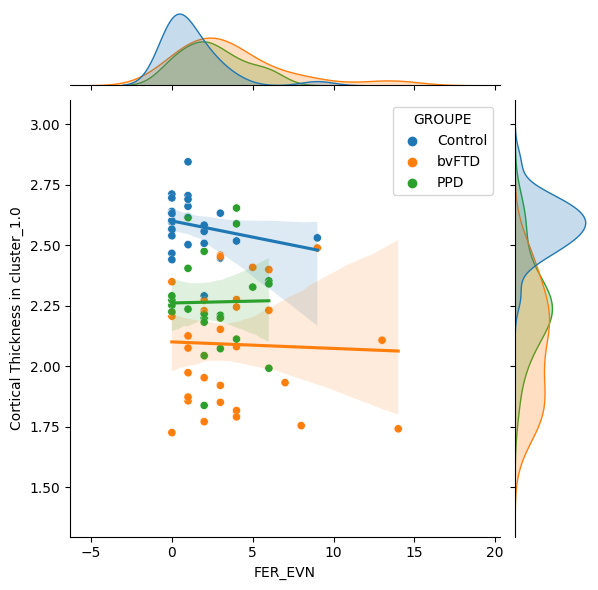

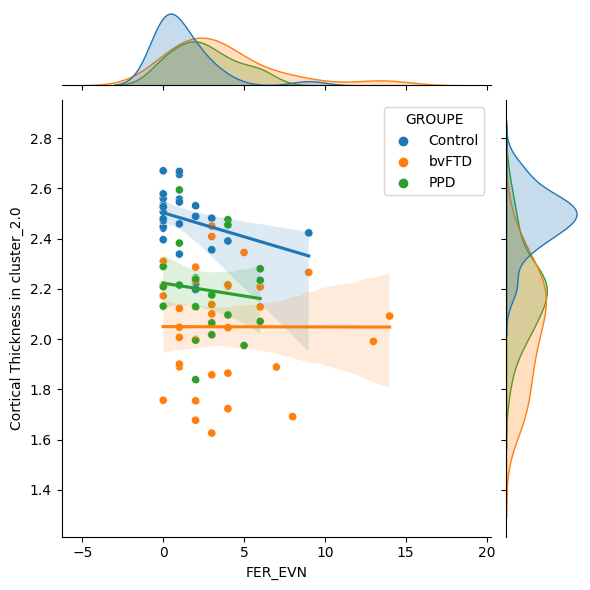

In [35]:
#je n'ai pas mis tout les types d'erreur, il y a un plantage sur une il faut identifier pour analyser le problème
lbr.corr_surface_var_func(var4Corr_typeErreurs[0:2],var4Cov,df_etude1_scoreAndCov,df_etude1_CT,os.path.join(STUDY_PATH,"screenshots"))

## 2.2 Deuxième étude 

In [36]:
df_etude2_scoreAndCov_index=clinical_data.where(clinical_data['ETUDE2_IRM']=='oui')['ETUDE2_IRM'].dropna().index.dropna()
df_etude2_scoreAndCov=clinical_data.loc[df_etude2_scoreAndCov_index]

df_etude2_sulcus = df_sulcus[df_sulcus.index.isin(df_etude2_scoreAndCov_index)]

var4Corr_scoresNeurpsy=['GREMOT_LS','GREMOT_LS_Pragmatique','GREMOT_FluVerbes','GREMOT_FluFruits','GREMOT_FluLettres','GREMOT_DenoObjets','GREMOT_DenoVerbes','GREMOT_DenoPersonnes','GREMOT_Discoursnarratif','GREMOT_CompSynt','GREMOT_VerifOP','GREMOT_VerifEP']
var4Corr_Frequence=['LS_Frequence','DN_Frequence']
var4Corr_Fluence=['CATEGORIAL_Total_Clu_Size','CATEGORIAL_Clus_Number','CATEGORIAL_Mean_Cluster_Size','CATEGORIAL_PERCTGE_Clu','CATEGORIAL_Switch','LITTERAL_Total_Clu_Size','LITTERAL_Clus_Number','LITTERAL_Mean_Cluster_Size','LITTERAL_PERCTGE_Clu','LITTERAL_Switch']
var4Corr=var4Corr_scoresNeurpsy+var4Corr_Frequence+var4Corr_Fluence

GREMOT_LS
25 values


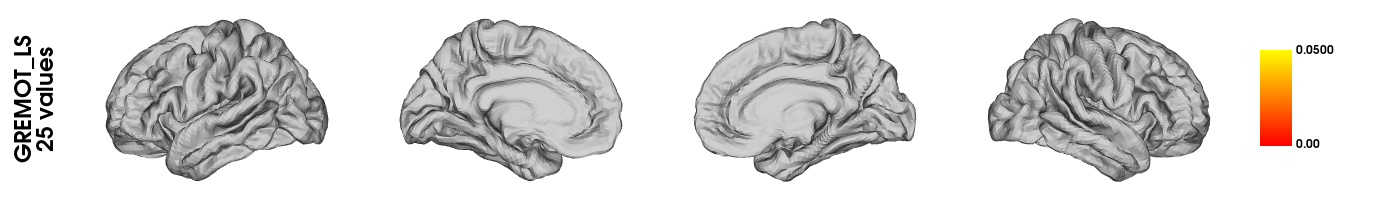

2024-09-02 12:06:04,647 - brainstat - WARNING - Column 0 has 3 unique values but was supplied as a numeric (i.e. continuous) variable. Should it be a categorical variable? If yes, the easiest way to provide categorical variables is to convert numerics to strings.
GREMOT_LS_Pragmatique
24 values


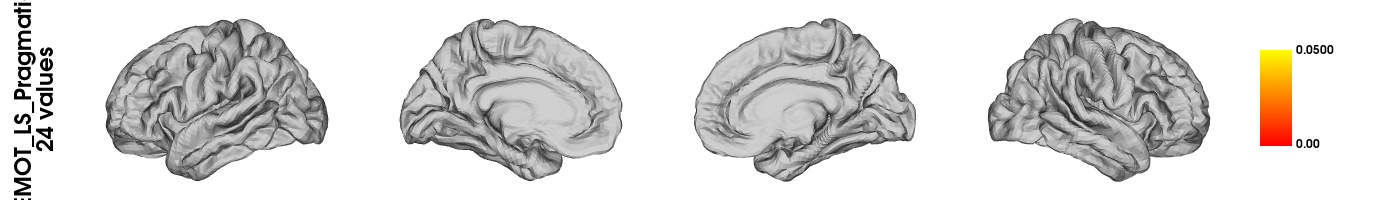

GREMOT_FluVerbes
25 values


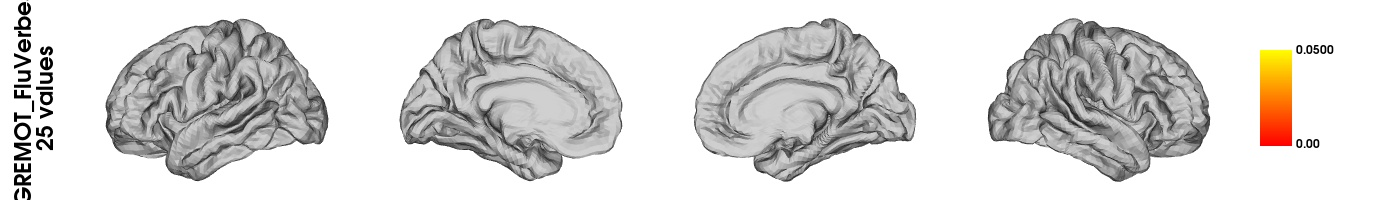

GREMOT_FluFruits
25 values


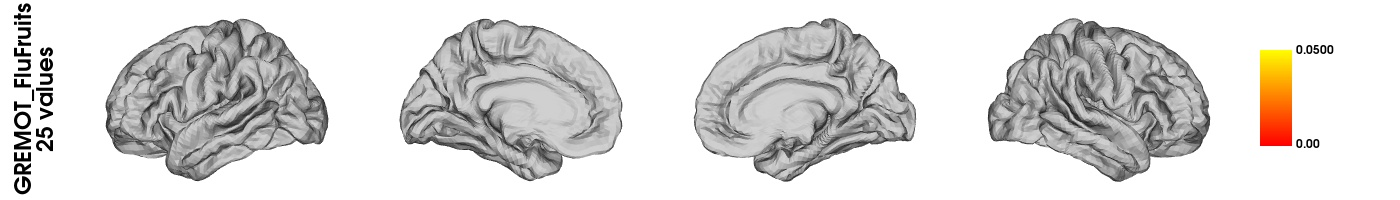

GREMOT_FluLettres
25 values


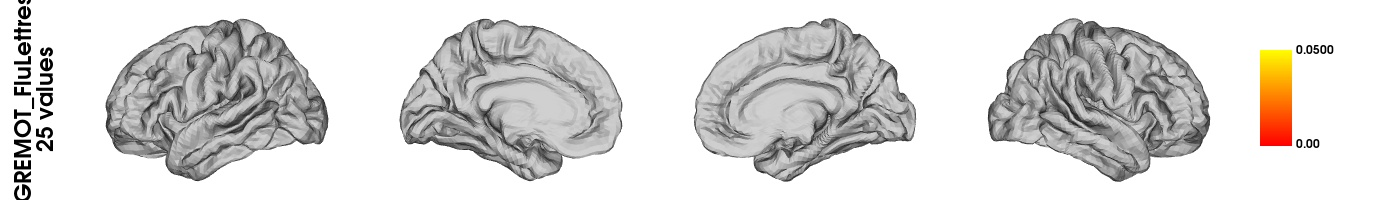

GREMOT_DenoObjets
25 values


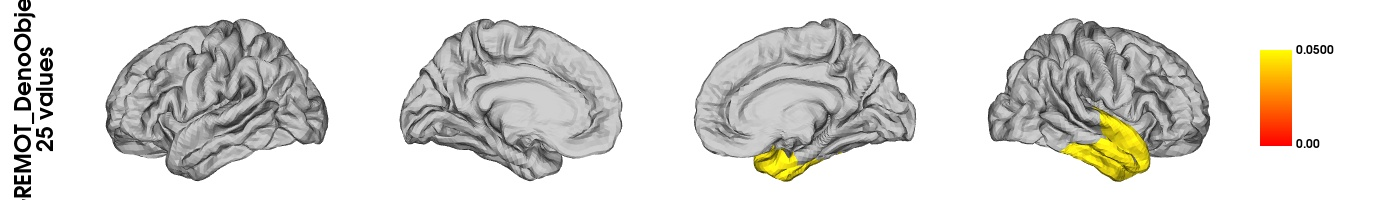

GREMOT_DenoVerbes
25 values


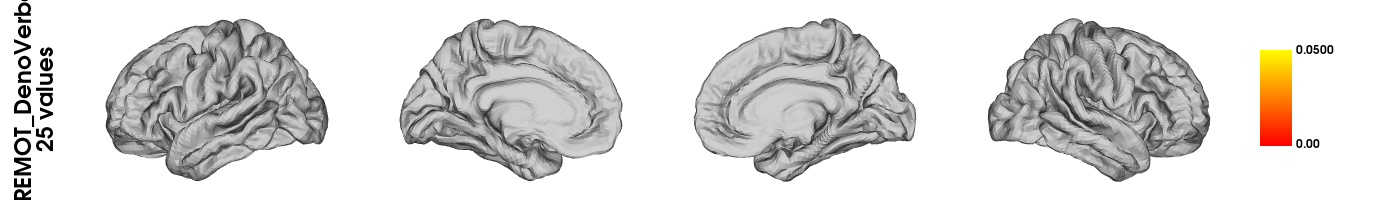

TypeError: '>' not supported between instances of 'NoneType' and 'float'

In [37]:
lbr.corr_surface_var_func(var4Corr_scoresNeurpsy,var4Cov,df_etude1_scoreAndCov,df_etude1_CT,os.path.join(STUDY_PATH,"screenshots"))

### 2.2.1. Corrélations avec la plage de fréquence vocale fondamentale

LS_Frequence
19 values


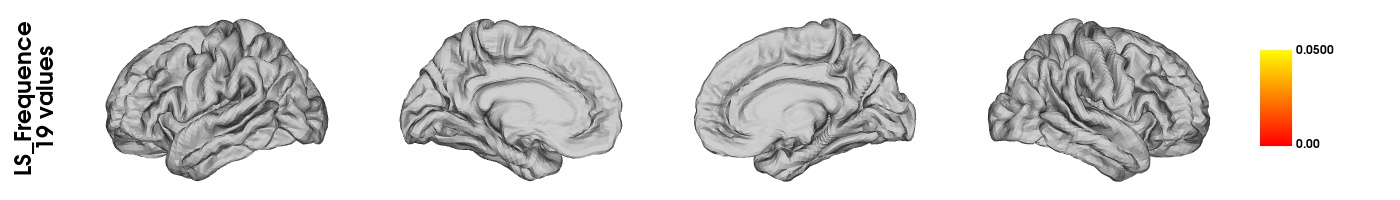

DN_Frequence
20 values


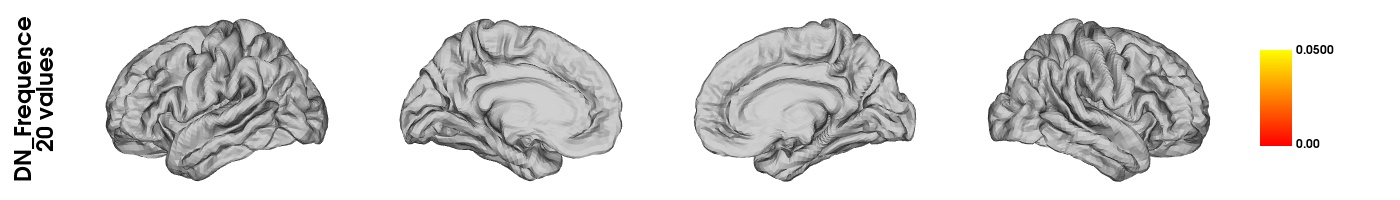

In [38]:
lbr.corr_surface_var_func(var4Corr_Frequence,var4Cov,df_etude1_scoreAndCov,df_etude1_CT,os.path.join(STUDY_PATH,"screenshots"))

### 2.2.2. Corrélations avec les données qualitatives de la fluence

In [39]:
lbr.corr_surface_var_func(var4Corr_Fluence,var4Cov,df_etude1_scoreAndCov,df_etude1_CT,os.path.join(STUDY_PATH,"screenshots"))

TypeError: '>' not supported between instances of 'NoneType' and 'float'

# Outils pour la sauvegarde en pdf

In [ ]:
!jupyter nbconvert --no-input --to pdf DFT_MB_PSY_v2.ipynb 

[NbConvertApp] Converting notebook DFT_MB_PSY_v2.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'DFT_MB_PSY_v2.ipynb'
Traceback (most recent call last):
  File "/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nbconvert/nbconvertapp.py", line 479, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nbconvert/exporters/exporter.py", line 189, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nbconvert/exporters/exporter.py", line 206, in from_file
    return self.from_notebook_node(
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nbconvert/exporters/pdf.py", line 181, in from_notebook_node
    latex, resources = super()